<a href="https://colab.research.google.com/github/vennela28/MLnow_2.0/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset**:
[Link to download the dataset](https://www.kaggle.com/spscientist/students-performance-in-exams)

**Date**: 12 June 2021

**Topic**: Univariate Linear Regression

**Author**: Vennela Sunnam

[Assessment Repository](https://github.com/vennela28/MLnow_2.0)

**Agenda**: Predict the `math score` based on the `reading score`

Information About Features

**gender**:	Male/Female

**race/ethnicity**:	group A, group B, group C...

**parental level of education**:	parental education details from high school to master's degree

**lunch**	selected type of lunch

**test preparation course**	test preparation course was completed by the student or not

**math score**	specifies score in math

**reading score**	specifies score in reading

**writing score**	specifies score in writing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/Univariate_Linear_Regression'

/content/drive/MyDrive/Univariate_Linear_Regression


In [3]:
import pandas as pd #work with csv or excel files
import numpy as np #work with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [6]:
performance = pd.read_csv('StudentsPerformance.csv', sep = ',')

In [25]:
performance.shape

(1000, 8)

In [8]:
performance = performance.rename(columns = {'parental level of education': 'parental_education', 'test preparation course': 'completion_status', 'math score': 'math', 'reading score': 'reading', 'writing score': 'writing'})

In [9]:
performance.head(2)

,gender,race/ethnicity,parental_education,lunch,completion_status,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [11]:
performance.isnull().values.any()

False

In [12]:
performance[performance.duplicated()]

,gender,race/ethnicity,parental_education,lunch,completion_status,math,reading,writing


In [13]:
performance['parental_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

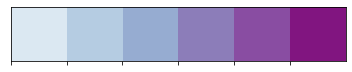

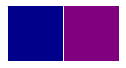

In [16]:
import seaborn as sns
sns.palplot(sns.color_palette('BuPu')) #Blue to Purple colors
pal = sns.color_palette('BuPu', 7) #print 7 color shades from Blue to Purple
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#00008B', '#800080'] #Blue Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

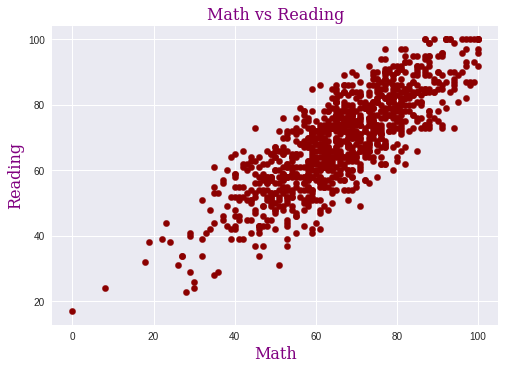

<Figure size 2880x2880 with 0 Axes>

In [19]:
plt.grid(True)
font = {'family': 'serif',
        'color':  'purple',
        'weight': 'normal',
        'size': 16,
        }
plt.scatter(performance['math'], performance['reading'],s=40,color='darkred')
plt.title('Math vs Reading',fontdict=font)
plt.xlabel('Math',fontdict=font)
plt.ylabel('Reading',fontdict=font)
plt.figure(figsize=(40,40))
plt.show()

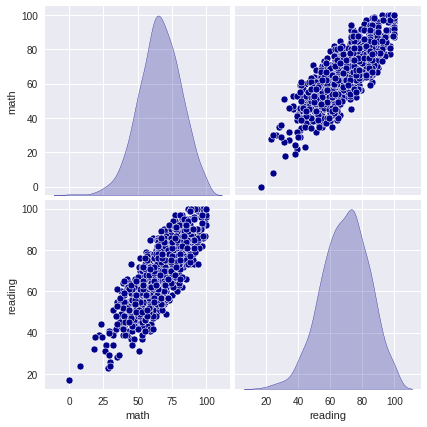

In [20]:
sns.pairplot(performance, x_vars=['math','reading'], y_vars=['math','reading'],diag_kind='kde',palette="hls",height=3)

In [21]:
performance.corr() 

,math,reading,writing
math,1.000000,0.817580,0.802642
reading,0.817580,1.000000,0.954598
writing,0.802642,0.954598,1.000000


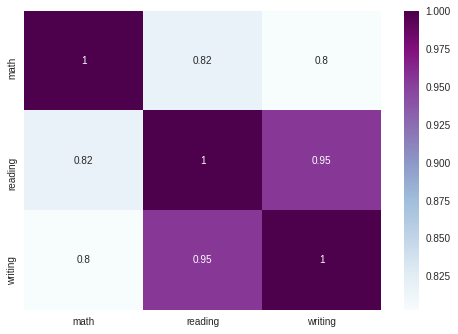

In [22]:
sns.heatmap(performance.corr(),annot=True,cmap="BuPu")

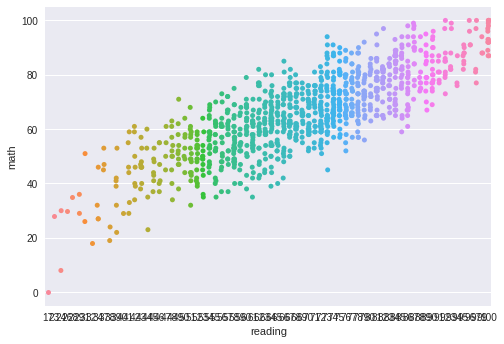

In [26]:
sns.stripplot(x = 'reading', y = 'math', data = performance)

In [56]:
scores = performance[['reading', 'math']]
scores.head()

,reading,math
0,72,72
1,90,69
2,95,90
3,57,47
4,78,76


In [59]:
scores.to_csv('test_scores.csv')

In [61]:
test_scores = pd.read_csv('test_scores.csv', sep = ',')
test_scores.head()

,Unnamed: 0,reading,math
0,0,72,72
1,1,90,69
2,2,95,90
3,3,57,47
4,4,78,76


In [63]:
trainDataset = test_scores.sample(frac=0.8, random_state=0) 
testDataset = test_scores.drop(trainDataset.index)

print(trainDataset.shape)
print(testDataset.shape)

(800, 3)
(200, 3)


In [66]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

In [67]:
trainLabels = trainFeatures.pop('math')
testLabels = testFeatures.pop('math')

print(trainLabels.head())
print(testLabels.head())

993    62
859    87
298    40
553    77
672    69
Name: math, dtype: int64
9     38
11    40
19    54
23    69
28    70
Name: math, dtype: int64


In [68]:
# univariate -> num(features) = 1

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

In [69]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [71]:
numEpochs = 400
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/400
25/25 [==============================] - 0s 4ms/step - loss: 7.2181 - mae: 7.2181 - mse: 79.3706 - val_loss: 6.9083 - val_mae: 6.9083 - val_mse: 75.0066
Epoch 2/400
25/25 [==============================] - 0s 1ms/step - loss: 7.2397 - mae: 7.2397 - mse: 79.4096 - val_loss: 6.9226 - val_mae: 6.9226 - val_mse: 75.0208
Epoch 3/400
25/25 [==============================] - 0s 2ms/step - loss: 7.2219 - mae: 7.2219 - mse: 78.6591 - val_loss: 6.9542 - val_mae: 6.9542 - val_mse: 75.7151
Epoch 4/400
25/25 [==============================] - 0s 1ms/step - loss: 7.2321 - mae: 7.2321 - mse: 79.5896 - val_loss: 6.9291 - val_mae: 6.9291 - val_mse: 75.0368
Epoch 5/400
25/25 [==============================] - 0s 1ms/step - loss: 7.2532 - mae: 7.2532 - mse: 79.4901 - val_loss: 6.9115 - val_mae: 6.9115 - val_mse: 74.7279
Epoch 6/400
25/25 [==============================] - 0s 2ms/step - loss: 7.2100 - mae: 7.2100 - mse: 78.6135 - val_loss: 6.9132 - val_mae: 6.9132 - val_mse: 74.7258
Epoch 7/40

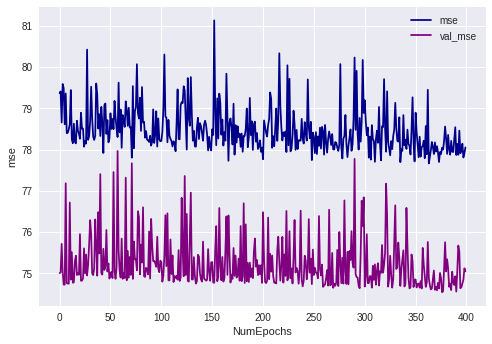

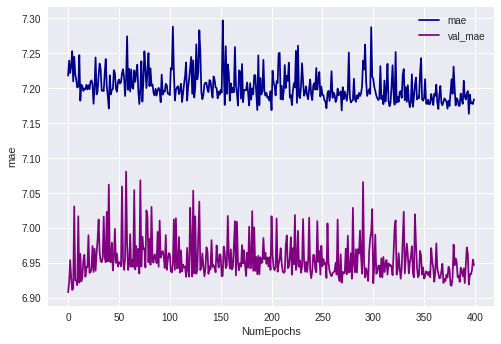

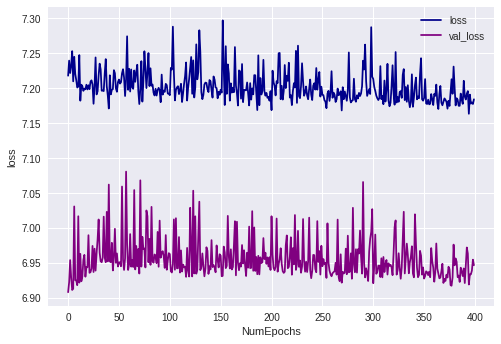

In [72]:
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')